# Data visualisation

In [2]:
# IMPORTS
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.interpolate import interp1d

Code to play with the dataset

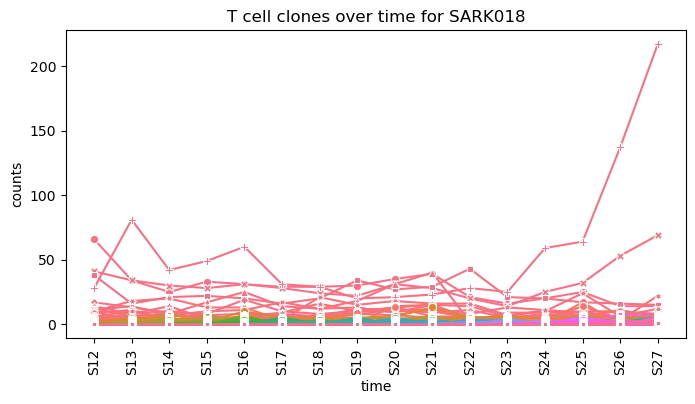

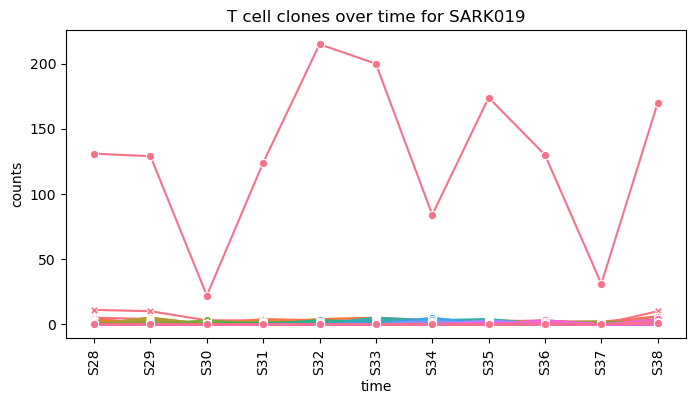

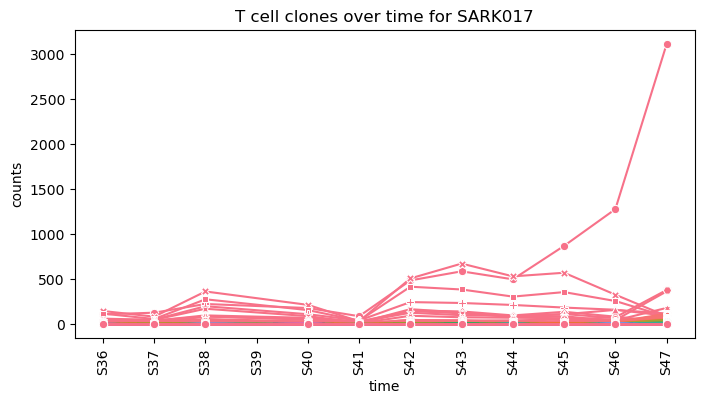

KeyboardInterrupt: 

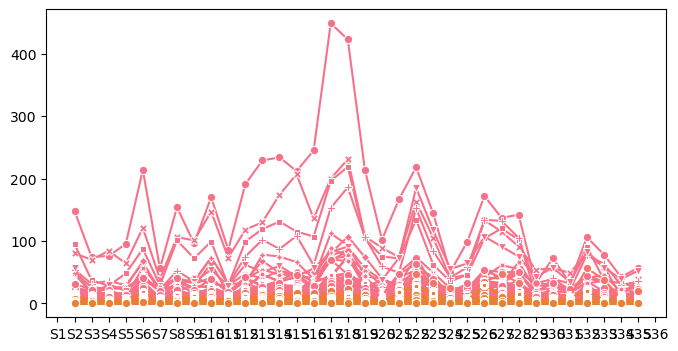

In [4]:
# IMPORT DATA
pat_list = ['SARK018', 'SARK019', 'SARK017', 'SARK021', 'SARK041', 'SARK011', 'SARK027', 
            'SARK029', 'SARK032', 'SARK033', 'SARK037', 'SARK052', 'SARK059']

file_path = 'TCR_sequencing_all_samples_adjusted_20240508.xlsx'

# Load the Excel file
for i, pat in enumerate(pat_list):
    sheet_index = (i+1)*2-2
    tcr_df = pd.read_excel(file_path, sheet_name=sheet_index, engine='openpyxl')
    # Remove rows where 'CDR3.amino.acid.sequence' is NaN
    tcr_df = tcr_df.dropna(subset=['CDR3.amino.acid.sequence'])

    # Select columns containing '_S'
    tcr_counts = tcr_df.filter(regex='_S').copy()

    # Rename columns by extracting the part after '_'
    tcr_counts.columns = [col.split('_')[1] for col in tcr_counts.columns]

    # Add an ID column
    tcr_counts['id'] = ['TCR' + str(i + 1) for i in range(len(tcr_counts))]

    # Melt the dataframe for plotting
    tcr_counts_m = tcr_counts.melt(id_vars='id', var_name='time', value_name='counts').copy()

    # Set factor levels for 'variable' AND order the time steps
    tcr_counts_m['time'] = pd.Categorical(tcr_counts_m['time'], categories=[f'S{i}' for i in range(1, 51)], ordered=True)

    # Plot 3: Line Plot
    plt.figure(figsize=(8, 4))
    sns.lineplot(data=tcr_counts_m, x='time', y='counts', hue='id', style='id', markers=True, dashes=False)
    plt.xticks(rotation=90)
    plt.title(f'T cell clones over time for {pat}')
    plt.legend().remove()
    plt.show()

